Tasks
1. Data Retrieval and Preprocessing
- Obtain MovieLens 1M dataset. []
- Load dataset. []
- Check data integrity: []
- Address issues like missing movies. []
- Handle data inconsistencies (e.g., user IDs with additional data, ratings for non-existent movies). []
- Create User-Item Interaction Matrix. []
- Split data for 5-fold cross-validation. []
- Handling Cold Starts (dealing with users or items not seen during training). []
2. Recommendation Algorithms
- Implement Naive Approaches: []
- Global Average Rating. []
- Average Rating per Item. []
- Average Rating per User. []
- Optimal Linear Combination with and without bias. []
- Implement UV Matrix Decomposition. []
- Implement Matrix Factorization with Gradient Descent and Regularization. []
- For each algorithm, calculate: 
- RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). []
- Address Cold Starts for the implemented algorithms. []
3. Visualization
- Apply dimensionality reduction techniques for visualization: []
- PCA (Principal Component Analysis). []
- t-SNE (t-Distributed Stochastic Neighbor Embedding). []
- UMAP (Uniform Manifold Approximation and Projection). []
4. Documentation and Reporting 
- Document code, algorithms, and preprocessing steps. []
- Summarize and analyze the results of each algorithm. []
- Provide insights into the best-performing algorithms. []
- Discuss challenges and limitations encountered during the implementation. []

In [12]:
import pandas as pd
import numpy as np
import sklearn as sklearn
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression

## Data retrival

In [16]:
# Loading data sets

# movies
df_movies = pd.read_csv("ml-1m/movies.dat", sep='::', encoding='ISO-8859-1', header=None, engine='python', names=['MovieID', 'Title', 'Genres'])
df_movies = df_movies.rename({0: 'MovieID', 1: 'Title', 2: 'Genre'}, axis='columns')

#ratings
df_ratings = pd.read_csv("ml-1m/ratings.dat", sep='::', encoding='ISO-8859-1', header=None, engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

#users
df_users = pd.read_csv("ml-1m/users.dat", sep='::', encoding='ISO-8859-1', header=None, engine="python", names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'])
df_users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode']



In [5]:
# Check for missing values in ratings dataset
df_ratings.isnull().sum()

# Check for missing values in movies dataset
df_movies.isnull().sum()

# Check for missing values in users dataset
df_users.isnull().sum()



UserID        0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64

In [6]:
# Checking data integrity

# movies
print(df_movies.head())
print

# ratings
print(df_ratings.head())
print

# users

print(df_users.head())

# In movies.dat there is missing movieID of 91 we create a placeholder
new_movie = pd.DataFrame({'MovieID': [91], 'Title': ['Unknown'], 'Genres': ['Unknown']})
df_movies = pd.concat([df_movies, new_movie], ignore_index=True)




   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation ZipCode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455


In [7]:
# Users split into 5

num_folds = 5

# Kfold object to split data into
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Convert the DataFrame to a list to ensure consistent indices
user_data = df_users.values
ratings_data = df_ratings.values

# Split the data into 5 folds
for fold, (train_indices, test_indices) in enumerate(kf.split(user_data)):
    # Split the users dataset
    train_users = df_users.iloc[train_indices]
    test_users = df_users.iloc[test_indices]

    # Split the ratings dataset
    train_ratings = df_ratings[df_ratings['UserID'].isin(train_users['UserID'])]
    test_ratings = df_ratings[df_ratings['UserID'].isin(test_users['UserID'])]

    print(f"Fold {fold + 1} - Train Users: {len(train_users)}, Test Users: {len(test_users)}")


Fold 1 - Train Users: 4832, Test Users: 1208
Fold 2 - Train Users: 4832, Test Users: 1208
Fold 3 - Train Users: 4832, Test Users: 1208
Fold 4 - Train Users: 4832, Test Users: 1208
Fold 5 - Train Users: 4832, Test Users: 1208


In [8]:
# Movie split into 5
num_folds = 5

# Kfold object to split data into
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Convert the DataFrame to a list to ensure consistent indices
movie_data = df_movies.values

# Split the data into 5 folds
for fold, (train_indices, test_indices) in enumerate(kf.split(movie_data)):
    # Split the movies dataset
    train_movies = df_movies.iloc[train_indices]
    test_movies = df_movies.iloc[test_indices]

    print(f"Fold {fold + 1} - Train Movies: {len(train_movies)}, Test Movies: {len(test_movies)}")

Fold 1 - Train Movies: 3107, Test Movies: 777
Fold 2 - Train Movies: 3107, Test Movies: 777
Fold 3 - Train Movies: 3107, Test Movies: 777
Fold 4 - Train Movies: 3107, Test Movies: 777
Fold 5 - Train Movies: 3108, Test Movies: 776


In [9]:
# Ratins into 5
num_folds = 5

# Kfold object to split data into
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Convert the DataFrame to a list to ensure consistent indices
ratings_data = df_ratings.values

# Split the data into 5 folds
for fold, (train_indices, test_indices) in enumerate(kf.split(ratings_data)):
    # Split the ratings dataset
    train_ratings = df_ratings.iloc[train_indices]
    test_ratings = df_ratings.iloc[test_indices]

    print(f"Fold {fold + 1} - Train Ratings: {len(train_ratings)}, Test Ratings: {len(test_ratings)}")


Fold 1 - Train Ratings: 800167, Test Ratings: 200042
Fold 2 - Train Ratings: 800167, Test Ratings: 200042
Fold 3 - Train Ratings: 800167, Test Ratings: 200042
Fold 4 - Train Ratings: 800167, Test Ratings: 200042
Fold 5 - Train Ratings: 800168, Test Ratings: 200041


# Recommendations algorithms

# The UV matrix decomposition

In this next cell we simply load data and then create a user-item matrix from movies and rating datasets.

In [43]:
# load the ratings data
file_path_ratings = 'ml-1m/ratings.dat'
df_ratings = pd.read_csv(file_path_ratings, sep='::', header=None, engine='python')
df_ratings = df_ratings.rename(columns={0: 'UserID', 1: 'MovieID', 2: 'Rating', 3: 'Timestamp'})

# load the movies data
file_path_movies = 'ml-1m/movies.dat'
df_movies = pd.read_csv(file_path_movies, sep='::', header=None, engine='python', encoding='latin-1')
df_movies = df_movies.rename(columns={0: 'MovieID', 1: 'Title', 2: 'Genres'})

# merge the ratings and movies data based on MovieID
df_merged = df_ratings.merge(df_movies, on='MovieID')

# reate the user-item interaction matrix
user_item_matrix = df_merged.pivot(index='UserID', columns='MovieID', values='Rating')

# convert the Pandas DataFrame to a NumPy array
user_item_matrix = user_item_matrix.values

# Display the user-item interaction matrix
print("User-Item Interaction Matrix:")
print(user_item_matrix)


User-Item Interaction Matrix:
[[ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 3. nan nan ... nan nan nan]]


In this cell  we once again create a user-item matrix but we prepare data for missing values. Wherever there is NaN value we filter out the row or collum. Then we calculate global average ranking to represent the average ranking of all the movies by all users. Then we also initialize the U and V matrices for matrix factorization. We set the parameter num_factors to 10 as this is "simple" problem. At the end we print out the shapes of U and V.

In [69]:
# load the ratings data
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')

# create the user-item interaction matrix
user_item_matrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating')

# data preparation: Filter out rows/columns with missing values (NaN)
valid_indices = ~np.isnan(user_item_matrix)
user_item_matrix = user_item_matrix[valid_indices]

# calculate the global average rating
global_average = user_item_matrix.mean().mean()

# initialize the U and V matrices with the global average divided by the number of latent factors
num_factors = 10  # Number of latent factors
num_users, num_items = user_item_matrix.shape  
U = np.full((num_users, num_factors), global_average / num_factors)
V = np.full((num_items, num_factors), global_average / num_factors)

# Display the shapes of U and V
print("Shape of U:", U.shape)
print("Shape of V:", V.shape)


Shape of U: (6040, 10)
Shape of V: (3706, 10)


This cell trains UV matrix using SGD to learn latent factors for users an movies. Iterates through and adjust to minimimaze the error between actual and predicted ratings. RSNSE is used to track the model accuracy.

In [71]:
# hyperparameters
learning_rate = 0.01  
num_epochs = 20 
regularization = 0.1  

def calculate_rmse(user_item_matrix, U, V):
    # predict ratings by taking the dot product of U and V
    predicted_ratings = np.dot(U, V.T)
    
    # calculate the RMSE
    squared_error = (user_item_matrix - predicted_ratings) ** 2
    mse = np.mean(squared_error[~np.isnan(user_item_matrix)])  # exclude NaN values
    rmse = np.sqrt(mse)
    
    return rmse


# training loop
for epoch in range(num_epochs):
    for user in range(num_users):
        for item in range(num_items):
            if not np.isnan(user_item_matrix.iloc[user, item]):
                # calculate the error (difference between actual and predicted rating)
                error = user_item_matrix.iloc[user, item] - np.dot(U[user, :], V[item, :])
                
                # update U and V using gradient descent
                U[user, :] += learning_rate * (error * V[item, :] - regularization * U[user, :])
                V[item, :] += learning_rate * (error * U[user, :] - regularization * V[item, :])
    
    # calculate RMSE at the end of each epoch
    rmse = calculate_rmse(user_item_matrix, U, V)
    print(f"Epoch {epoch + 1}/{num_epochs}, RMSE: {rmse:.4f}")

# display the shapes of U and V after training 
print("Shape of U after training:", U.shape)
print("Shape of V after training:", V.shape)


Epoch 1/20, RMSE: 1.3885
Epoch 2/20, RMSE: 0.9313
Epoch 3/20, RMSE: 0.9313


This is similiar to the cell above but keeps track of RSME across all epochs to keep an eye on how it improves.

In [23]:
# initialize an empty list to store RMSE values for each epoch
rmse_values = []

# training loop
for epoch in range(num_epochs):
    for user in range(num_users):
        for item in range(num_items):
            if not np.isnan(user_item_matrix.iloc[user, item]):
                # calculate the error (difference between actual and predicted rating)
                error = user_item_matrix.iloc[user, item] - np.dot(U[user, :], V[item, :])
                
                # update U and V using gradient descent
                U[user, :] += learning_rate * (error * V[item, :] - regularization * U[user, :])
                V[item, :] += learning_rate * (error * U[user, :] - regularization * V[item, :])
    
    # calculate RMSE at the end of each epoch
    predicted_ratings = np.dot(U, V.T)
    rmse = np.sqrt(np.nanmean((user_item_matrix - predicted_ratings) ** 2))
    rmse_values.append(rmse)
    
    print(f"Epoch {epoch + 1}/{num_epochs}, RMSE: {rmse:.4f}")

Epoch 1/1, RMSE: 0.9311


This was an attempt to set up cross validation for this algorthim but it was not successfull. For the most of the time I got error that the dataset was out of bounds or out of indexes. So I decided to skip 5 fold validation for this algorthim.

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold


# number of splits (K) for cross-validation
K = 5

# Initialize KFold with the number of splits (K)
kf = KFold(n_splits=K)

# Convert user_item_matrix to a NumPy array (if not already)
user_item_matrix = user_item_matrix.values

# Iterate over the folds
for train_indices, val_indices in kf.split(user_item_matrix):
    train_indices = np.array(train_indices)  # Convert indices to NumPy array
    val_indices = np.array(val_indices)  # Convert indices to NumPy array

    # Select valid rows from the user_item_matrix using the indices
    train_set = user_item_matrix[train_indices, :]
    val_set = user_item_matrix[val_indices, :]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Creating a index-to-movie mapping dictionary. To help looking up movies by their index. In the dataset there are not based on index as they are some missing movies.

In [59]:
movie_data_file = 'ml-1m/movies.dat'

# read the movie data from the file
with open(movie_data_file, 'r', encoding='latin-1') as file:
    movies_data = file.readlines()

# create a dictionary to map indices to movie data
item_id_mapping = {}

# Iterate through the movies data and create the mapping
for index, movie_data in enumerate(movies_data):
    # Split the movie data string to get the MovieID (first element)
    movie_id = movie_data.split("::")[0]
    item_id_mapping[index] = movie_id


Creation of the recommendation system using U and V.T (transpose of the matrix 'V') List of 10 movie recommendation for each user.

In [63]:
# number of top recommendations for each user
top_n = 10

# create an empty dictionary to store recommendations for each user
recommendations = {}

# calculate predicted ratings for all user-item pairs
predicted_ratings = np.dot(U, V.T)

# get the number of users and items
num_users, num_items = predicted_ratings.shape

# loop through users to generate top-N recommendations
for user in range(num_users):
    # find items the user has already interacted with
    user_interactions = user_item_matrix[user, :]
    
    # exclude items that the user has already interacted with
    predicted_ratings[user, user_interactions.nonzero()] = -1
    
    # get indices of the top-N items with the highest predicted ratings
    top_indices = np.argsort(predicted_ratings[user])[::-1][:top_n]
    
    # get the actual movie IDs from the indices
    top_movie_ids = [item_id_mapping[index] for index in top_indices]

    # store the top-N recommendations for current user
    recommendations[user] = top_movie_ids


user_id = 0 
user_recommendations = recommendations[user_id]
print(f"Top-{top_n} Recommendations for User {user_id}: {user_recommendations}")


Top-10 Recommendations for User 0: ['3774', '1264', '1262', '1261', '1260', '1259', '1258', '1257', '1256', '1255']


Visualization of combined_matrix U and V.T. 



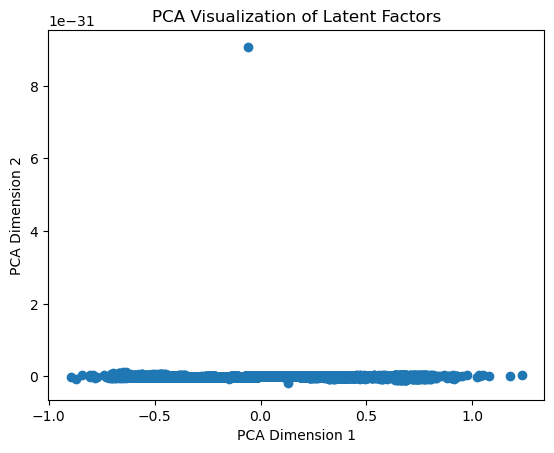

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Combine user and item matrices (U and V) if needed
combined_matrix = np.concatenate((U, V), axis=0)

# Apply PCA
pca = PCA()
pca.fit(combined_matrix)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot to visualize the explained variance ratio
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of Explained Variance Ratio')
plt.show()


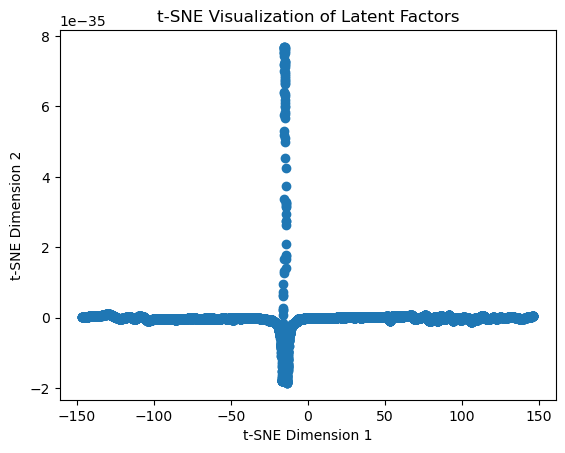

In [65]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Combine user and item matrices (U and V) if needed
combined_matrix = np.concatenate((U, V), axis=0)

# Apply t-SNE for dimension reduction
tsne = TSNE(n_components=2)  # Reduce to 2 dimensions
reduced_matrix = tsne.fit_transform(combined_matrix)

# Plot the reduced matrix
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Latent Factors')
plt.show()

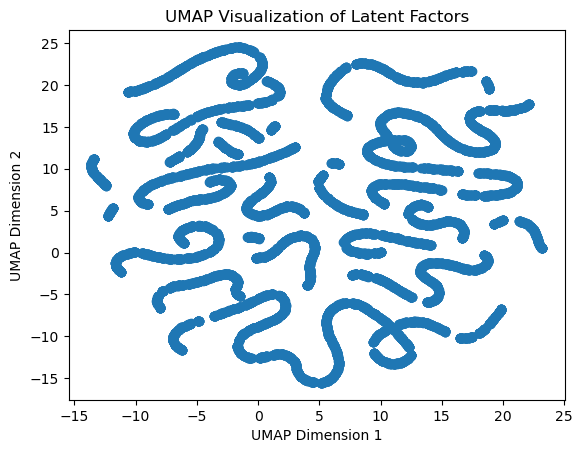

In [66]:
import numpy as np
import umap
import matplotlib.pyplot as plt

# Combine user and item matrices (U and V) if needed
combined_matrix = np.concatenate((U, V), axis=0)

# Apply UMAP for dimension reduction
reducer = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
reduced_matrix = reducer.fit_transform(combined_matrix)

# Plot the reduced matrix
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Latent Factors')
plt.show()


/Users/vanbuncha/anaconda3/envs/adm_as1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vanbuncha/anaconda3/envs/adm_as1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vanbuncha/anaconda3/envs/adm_as1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vanbuncha/anaconda3/envs/adm_as1/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

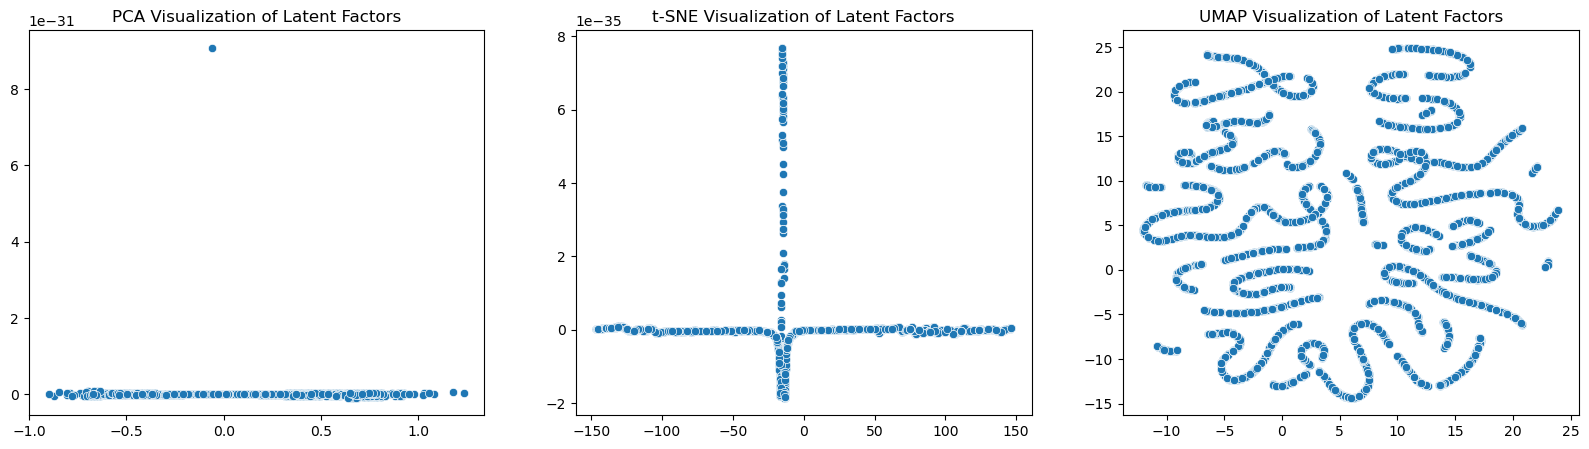

In [56]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Combine user and item matrices (U and V) to create a single matrix for visualization
combined_matrix = np.vstack((U, V))

# Apply PCA for dimension reduction
pca = PCA(n_components=2)
reduced_matrix_pca = pca.fit_transform(combined_matrix)

# Apply t-SNE for dimension reduction
tsne = TSNE(n_components=2)
reduced_matrix_tsne = tsne.fit_transform(combined_matrix)

# Apply UMAP for dimension reduction
umap_model = umap.UMAP(n_components=2)
reduced_matrix_umap = umap_model.fit_transform(combined_matrix)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot PCA
sns.scatterplot(x=reduced_matrix_pca[:, 0], y=reduced_matrix_pca[:, 1], ax=axs[0])
axs[0].set_title('PCA Visualization of Latent Factors')

# Plot t-SNE
sns.scatterplot(x=reduced_matrix_tsne[:, 0], y=reduced_matrix_tsne[:, 1], ax=axs[1])
axs[1].set_title('t-SNE Visualization of Latent Factors')

# Plot UMAP
sns.scatterplot(x=reduced_matrix_umap[:, 0], y=reduced_matrix_umap[:, 1], ax=axs[2])
axs[2].set_title('UMAP Visualization of Latent Factors')

plt.show()
